# RBF-Network interpolation examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RBFN import RBFN

## 1D interpolation example

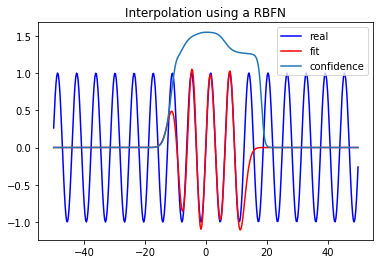

In [2]:
# generating data
x_train = np.linspace(-10, 10, 50)
y_train = np.sin(x_train)

# fitting RBF-Network with data
model = RBFN(hidden_shape=10, sigma=0.1)
model.fit(x_train, y_train)

model.activations(x_train)
x_pred = np.linspace(-50.0, 50.0, 400)
y_true = np.sin(x_pred)

y_pred = model.predict(x_pred)
y_confidence = model.confidence(x_pred)

# plotting 1D interpolation
plt.plot(x_pred, y_true, 'b-', label='real')
plt.plot(x_pred, y_pred, 'r-', label='fit')
plt.plot(x_pred,y_confidence,label='confidence')
plt.legend(loc='upper right')
plt.title('Interpolation using a RBFN')
plt.show()

## 2D interpolation example

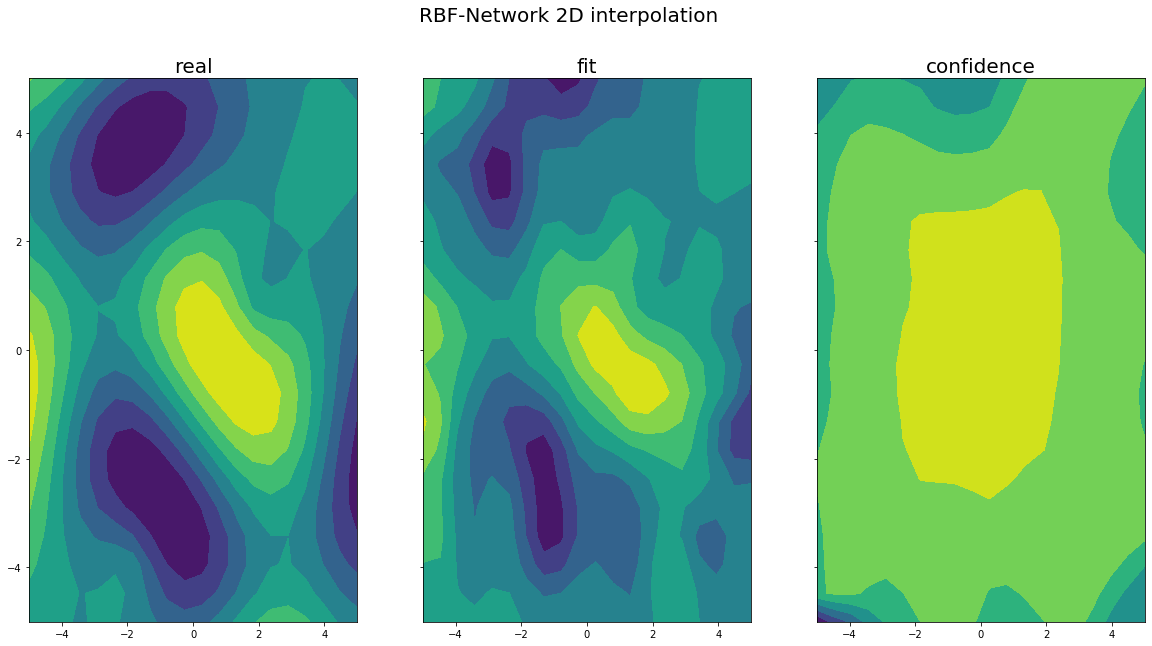

In [5]:
# generating dummy data for interpolation
x_train, y_train = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))
z_train = (np.sin(np.sqrt((x_train - 2.)**2 + (y_train - 1)**2)) -
     np.sin(np.sqrt((x_train + 2.)**2 + (y_train + 4)**2))) / 2.
# fitting RBF-Network with data
features_train = np.asarray(list(zip(x_train.flatten(), y_train.flatten())))
# print(np.shape(features_train),np.shape(z_train))

x_pred, y_pred = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))
z_pred_true = (np.sin(np.sqrt((x_pred - 2.)**2 + (y_pred - 1)**2)) -
     np.sin(np.sqrt((x_pred + 2.)**2 + (y_pred + 4)**2))) / 2.
# fitting RBF-Network with data
features_pred = np.asarray(list(zip(x_pred.flatten(), y_pred.flatten())))

model = RBFN(hidden_shape=70, sigma=1.)
model.fit(features_train, z_train.flatten())
predictions_pred = model.predict(features_pred)

model.activations(features_train)
predictions_confidence = model.confidence(features_pred)


# plotting 2D interpolation
figure, ax = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
figure.suptitle('RBF-Network 2D interpolation', fontsize=20)
ax[0].set_title('real', fontsize=20)
ax[1].set_title('fit', fontsize=20)
ax[2].set_title('confidence',fontsize=20)
ax[0].contourf(x_pred, y_pred, z_pred_true)
ax[1].contourf(x_pred, y_pred, predictions_pred.reshape(20, 20))
ax[2].contourf(x_pred, y_pred, predictions_confidence.reshape(20, 20))
plt.show()